In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
sys.path.insert(1, '../libs')
from scatter_hull import ScatterHull

In [2]:
sh = ScatterHull()
all_volcanoes = sh.get_all_volcanoes()

In [3]:
all_volcanoes

['Aguilera',
 'Antillanca-Casablanca',
 'Apagado',
 'Caburga-Huelemolle',
 'Calbuco',
 'Carrán-Los Venados',
 'Cay',
 'Chaitén',
 'Corcovado',
 'Cordón Cabrera',
 'Hornopirén',
 'Huanquihue Group',
 'Hudson',
 'Huequi',
 'Lanín',
 'Lautaro',
 'Llaima',
 'Macá',
 'Melimoyu',
 'Mentolat',
 'Michinmahuida',
 'Mocho-Choshuenco',
 'Monte Burney',
 'Osorno',
 'Puyehue-Cordón Caulle',
 'Quetrupillán',
 'Reclus',
 'Sollipulli',
 'Subsidiary Vcha dome',
 'Villarrica',
 'Yanteles',
 'Yate']

In [4]:
simbología = pd.read_excel('../data/Simbologia.xlsx')
def get_volcano_color(volcano):    
    Event = simbología.loc[simbología['Volcano'] == volcano]
    color = Event.values[0,2]
    return color

In [5]:
n_clusters = {}
n_clusters['Aguilera'] = 2
n_clusters['Antillanca-Casablanca'] =3
n_clusters['Apagado'] = 2
n_clusters['Caburga-Huelemolle'] = 1
n_clusters['Calbuco'] = 2
n_clusters['Carrán-Los Venados'] = 2
n_clusters['Cay'] = 3
n_clusters['Chaitén'] = 1
n_clusters['Corcovado'] = 0
n_clusters['Cordón Cabrera'] = 0
n_clusters['Hornopirén'] = 3
n_clusters['Huanquihue Group'] = 1
n_clusters['Hudson'] = 1
n_clusters['Huequi'] = 3
n_clusters['Lanín'] = 3
n_clusters['Lautaro'] = 2
n_clusters['Llaima'] = 1
n_clusters['Macá'] = 3 
n_clusters['Melimoyu'] = 3
n_clusters['Mentolat'] = 2
n_clusters['Michinmahuida'] = 1
n_clusters['Mocho-Choshuenco'] = 1
n_clusters['Monte Burney'] = 3
n_clusters['Osorno'] = 2
n_clusters['Puyehue-Cordón Caulle'] = 2
n_clusters['Quetrupillán'] = 2
n_clusters['Reclus'] = 2
n_clusters['Sollipulli'] = 2
n_clusters['Subsidiary Vcha dome'] = 3
n_clusters['Villarrica'] = 3
n_clusters['Yanteles'] = 1
n_clusters['Yate'] = 1

N points:  32


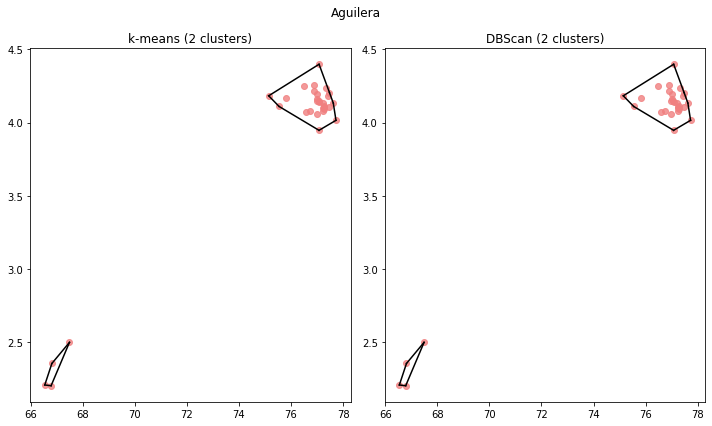

N points:  116


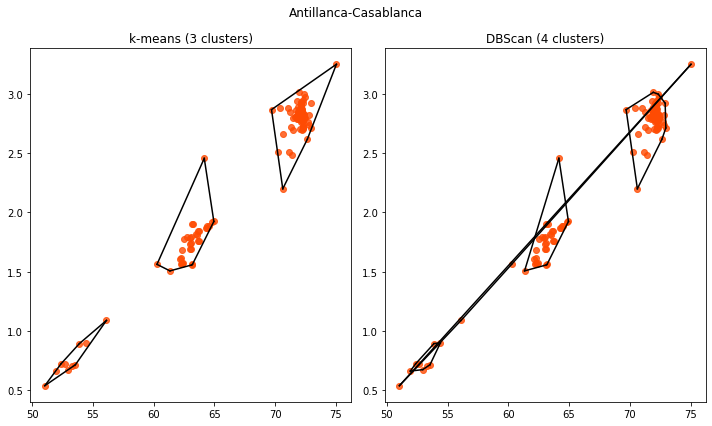

N points:  32


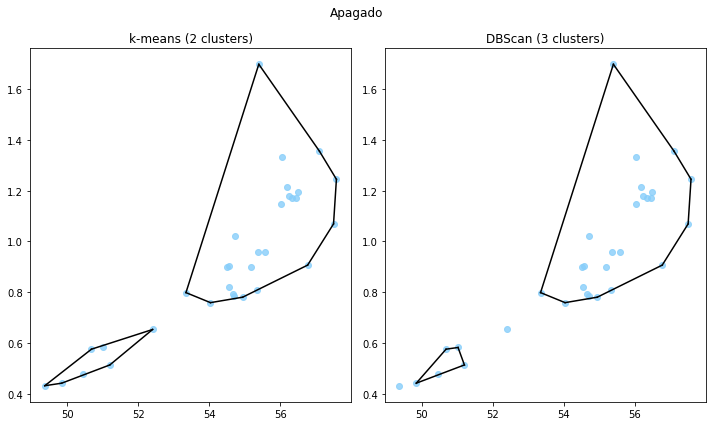

N points:  134


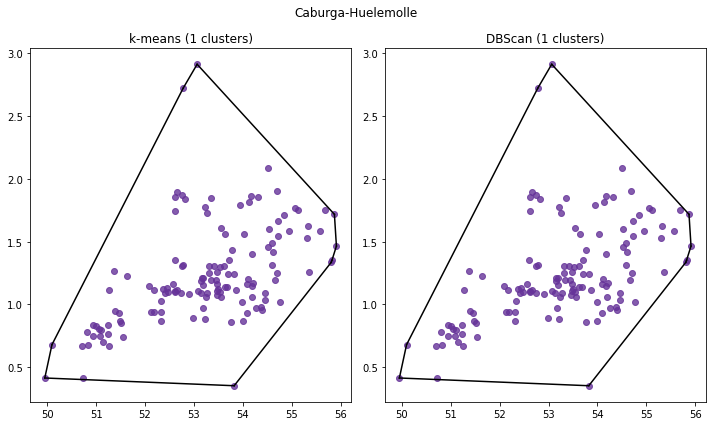

N points:  142


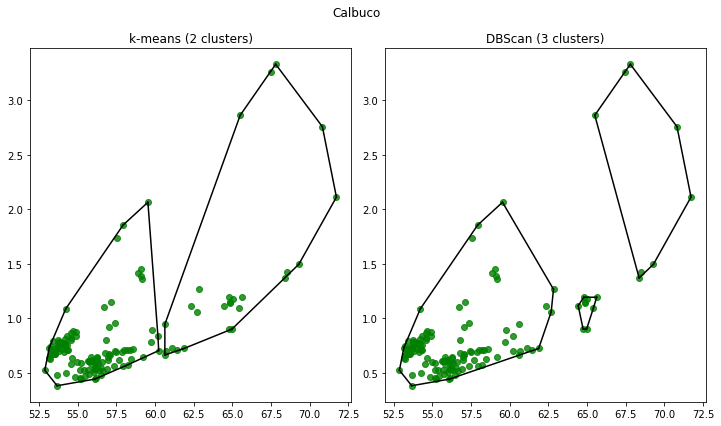

N points:  155


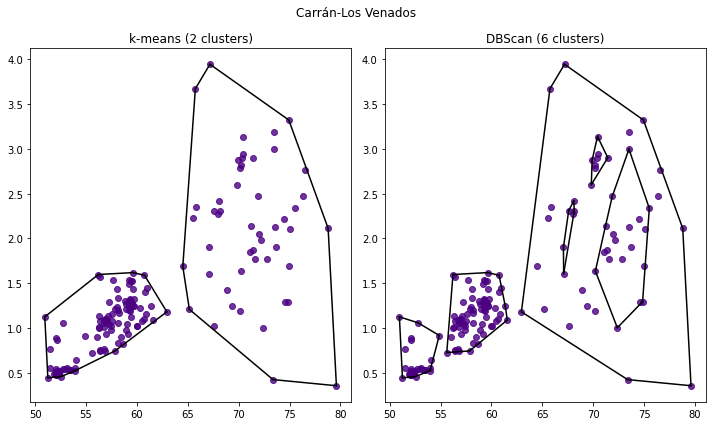

N points:  17


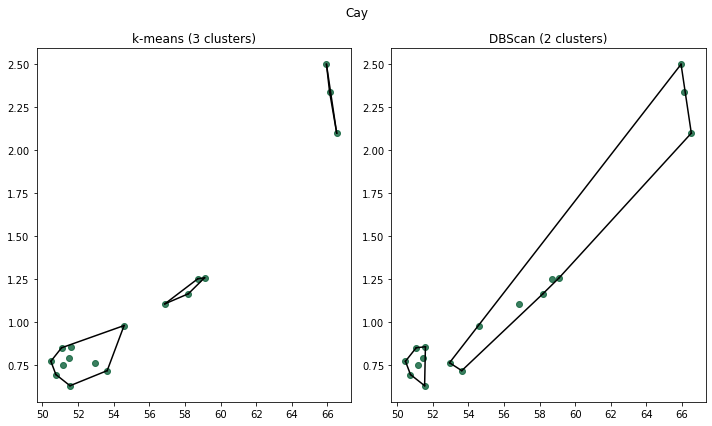

N points:  985


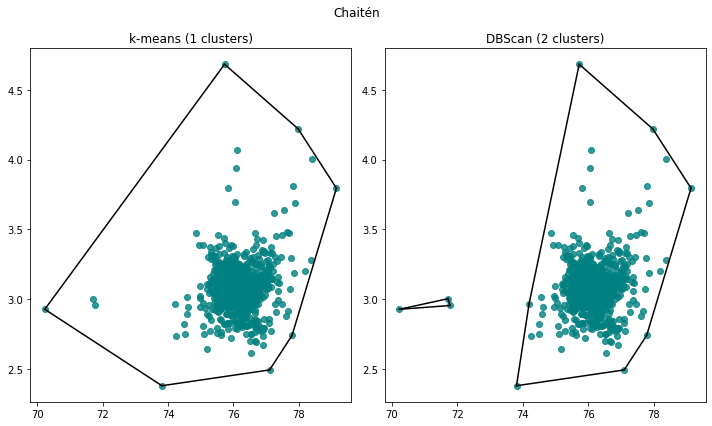

N points:  4


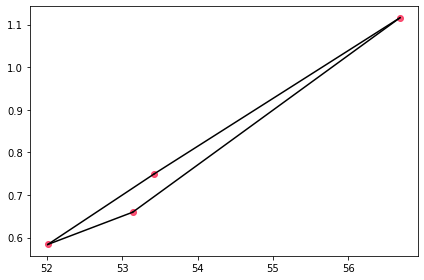

N points:  4


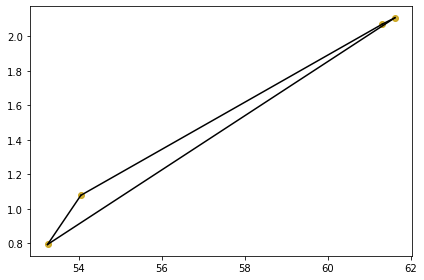

N points:  20


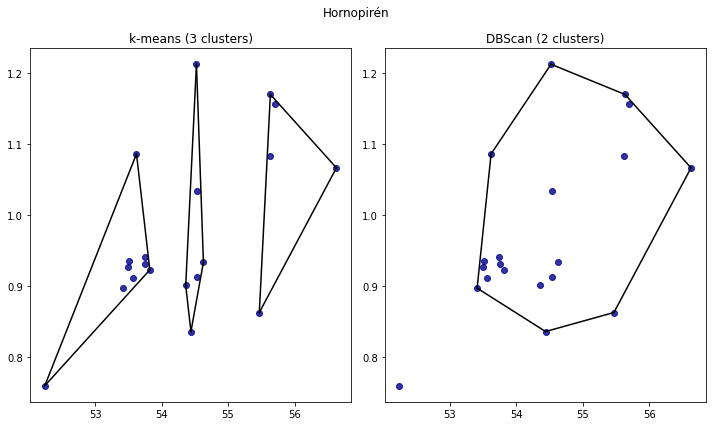

N points:  176


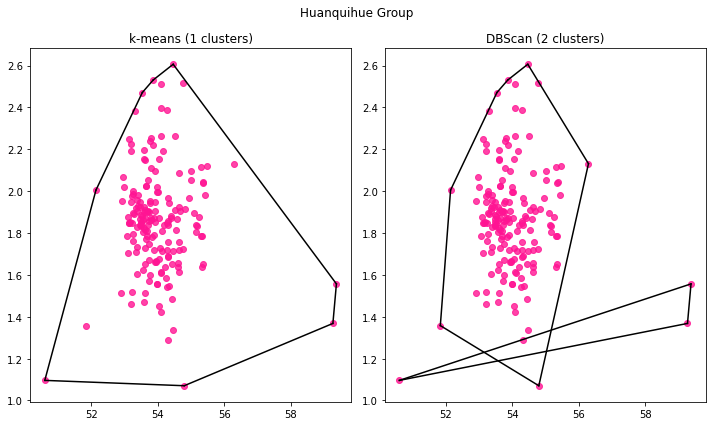

N points:  742


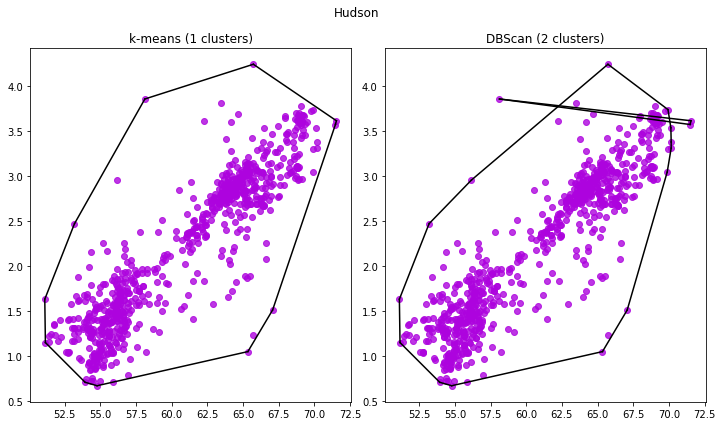

N points:  11


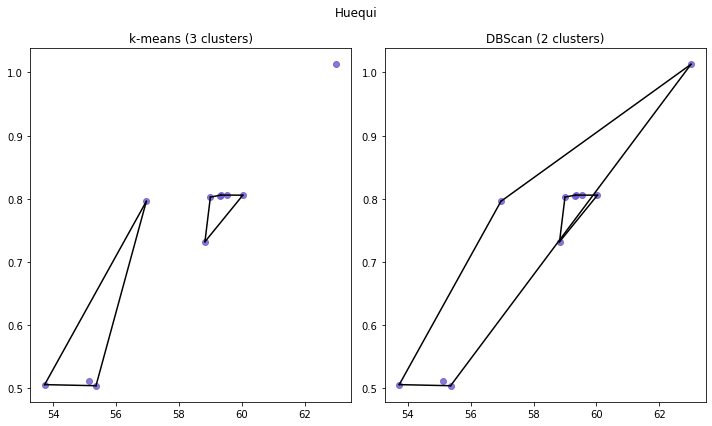

N points:  81


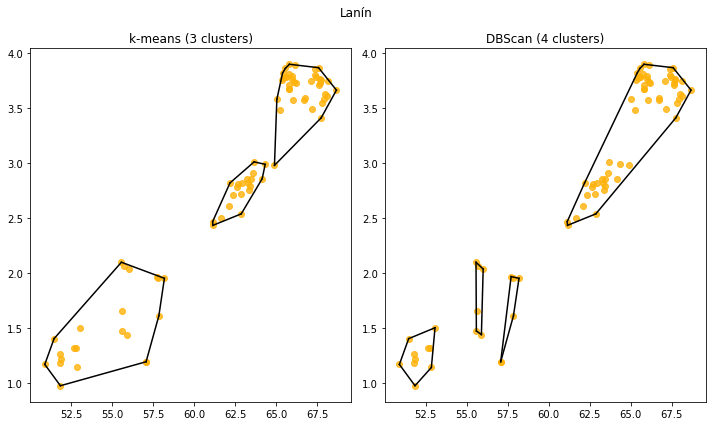

N points:  38


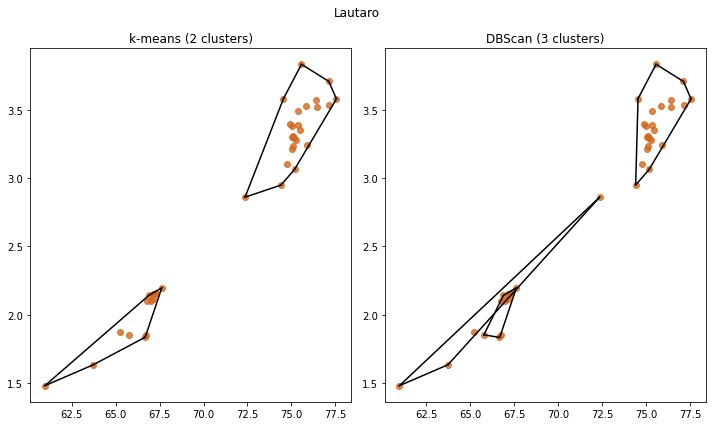

N points:  1412


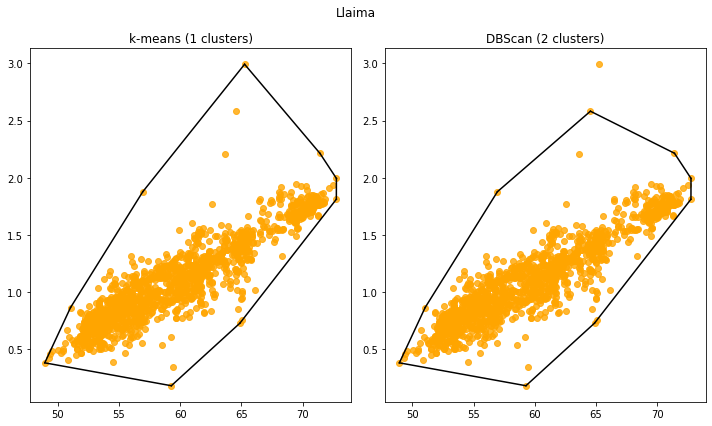

N points:  15


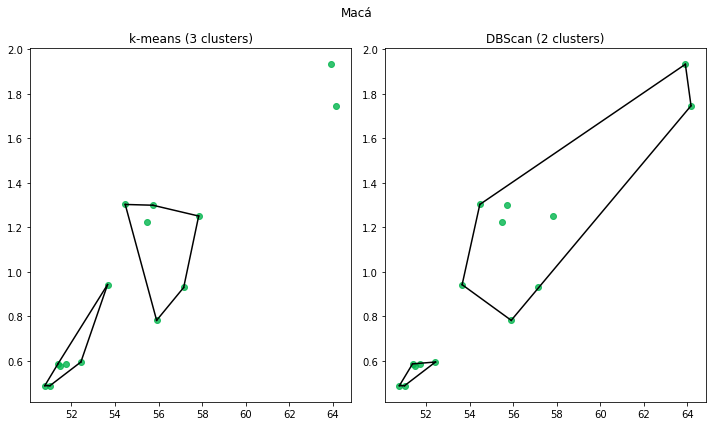

N points:  346


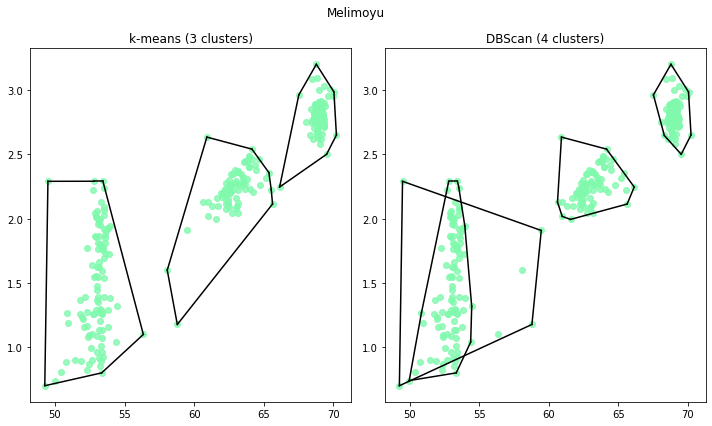

N points:  51


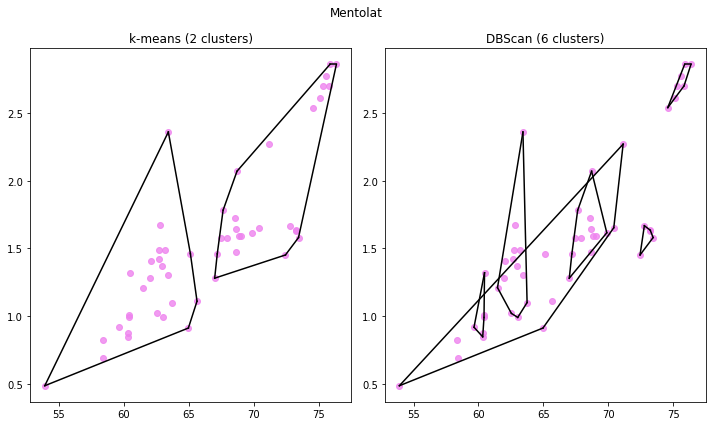

N points:  369


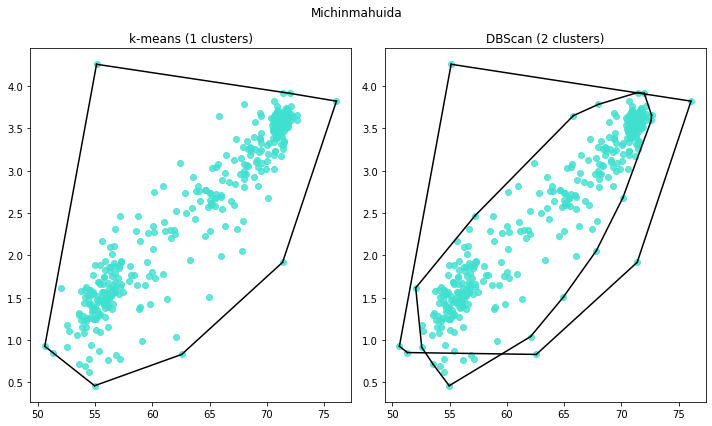

N points:  2659


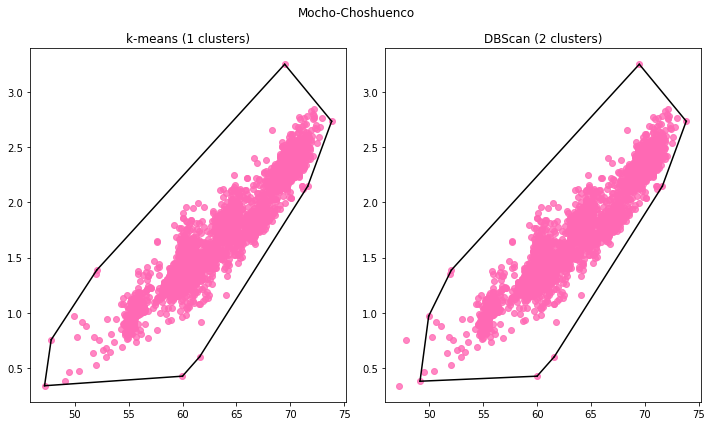

N points:  370


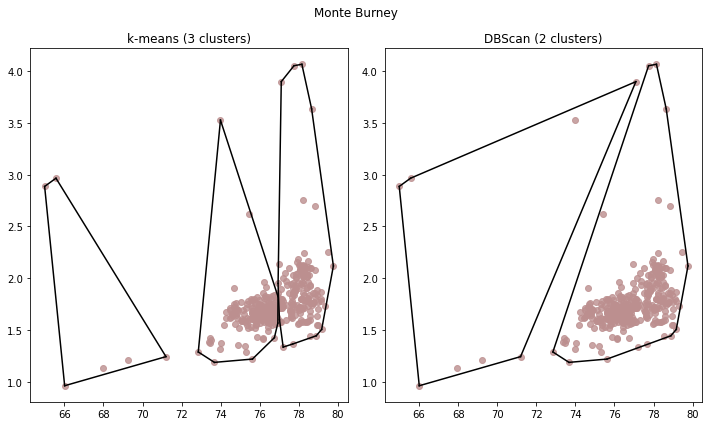

N points:  96


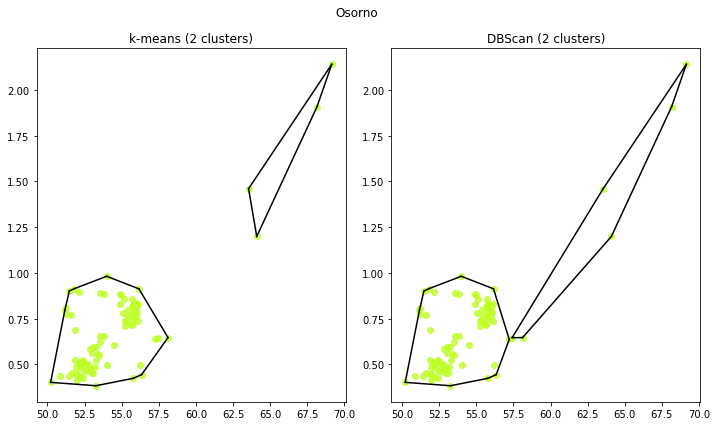

N points:  1573


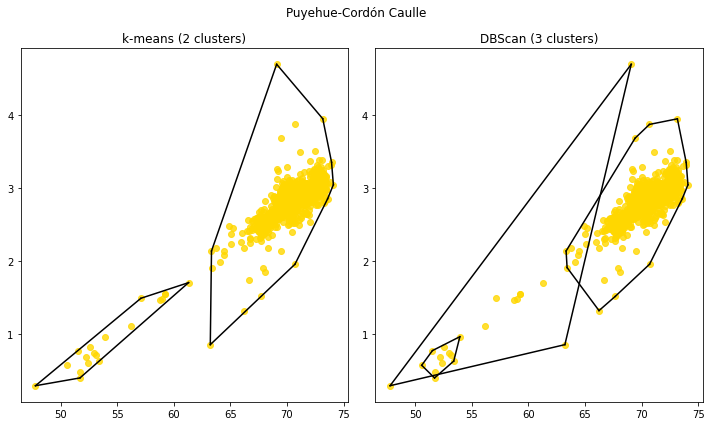

N points:  1205


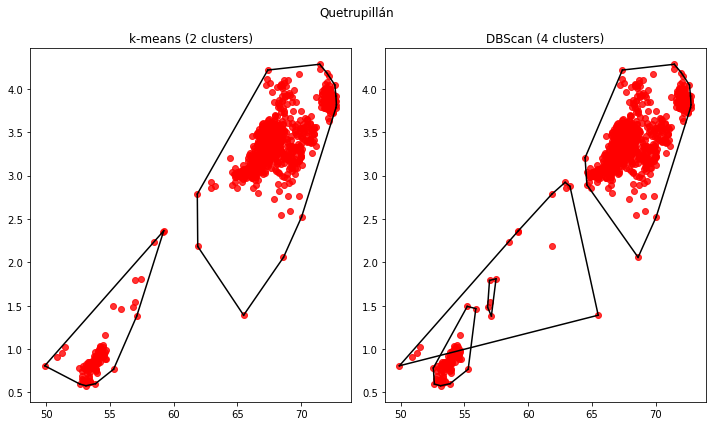

N points:  132


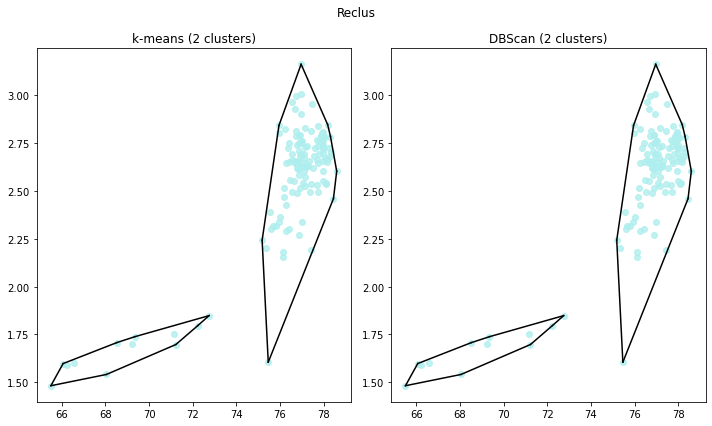

N points:  70


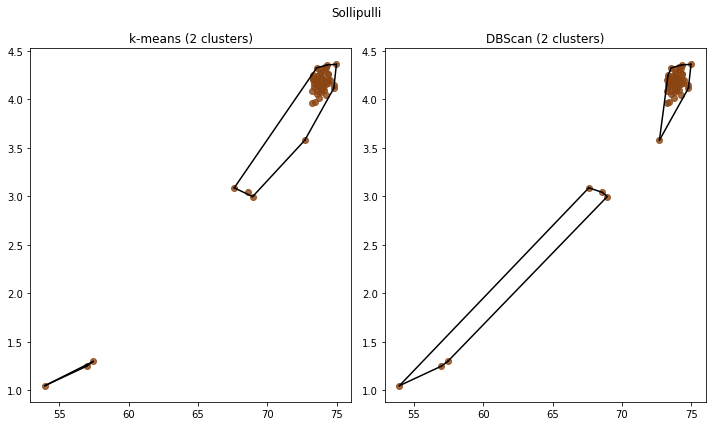

N points:  21


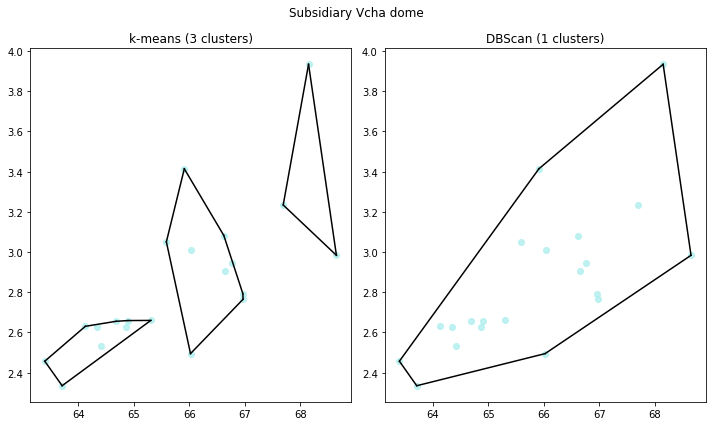

N points:  859


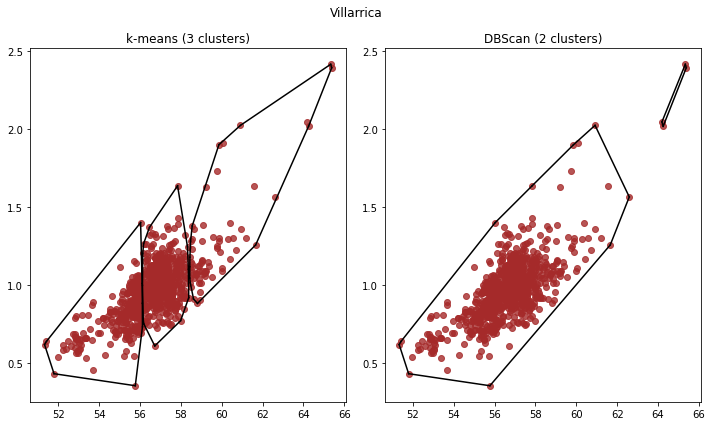

N points:  2


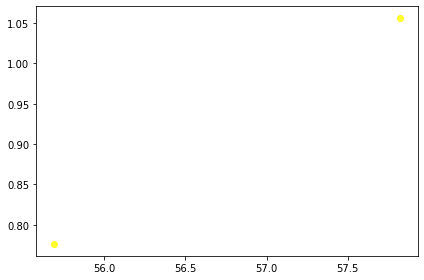

N points:  37


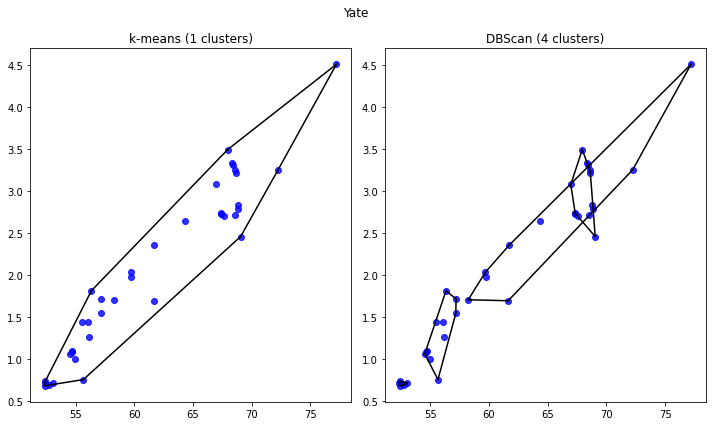

In [9]:
for v in all_volcanoes:
    points = sh.get_points_per_volcano(v, 'SiO2','K2O')
    n_clus = n_clusters[v]
    color = get_volcano_color(v)
    print('N points: ', len(points))
    if len(points) < 5:
        plt.scatter(points[:,0], points[:,1], color=color, alpha=.8)
        if len(points) > 2:
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
        fig.suptitle(v)
        
        # Kmeans
        clusters = sh.get_clusters_kmeans(n_clus, points)
        title = 'k-means (' + str(len(clusters.keys())) + ' clusters)'
        axes[0].title.set_text(title)
        for c_label, c_points in clusters.items():
            axes[0].scatter(c_points[:,0], c_points[:,1], color=color, alpha=.8)
            if len(c_points) > 2:
                hull = ConvexHull(c_points)
                #print('N simplices: ', len(hull.simplices))
                for simplex in hull.simplices:
                    axes[0].plot(c_points[simplex, 0], c_points[simplex, 1], 'k-')
                    
        # DBSCAN
        clusters = sh.get_clusters_dbscan(points, eps=1, algorithm='auto')
        title = 'DBScan (' + str(len(clusters.keys())) + ' clusters)'
        axes[1].title.set_text(title)
        #print('N clusters: ', len(clusters.keys()))
        for c_label, c_points in clusters.items():
            axes[1].scatter(c_points[:,0], c_points[:,1], color=color, alpha=.8)
            if len(c_points) > 2:
                hull = ConvexHull(c_points)
                #print('N simplices: ', len(hull.simplices))
                for simplex in hull.simplices:
                    axes[1].plot(c_points[simplex, 0], c_points[simplex, 1], 'k-')
        
    plt.tight_layout()
    plt.show()